In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
plt.rcParams['figure.figsize']=(14,8)

In [122]:
data = pd.read_csv('yellow_tripdata_2021-01.csv')
data.head(10)

/Users/safaa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
5,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,N,224,68,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
6,1.0,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,N,95,157,2.0,16.0,0.5,0.5,0.00,0.0,0.3,17.30,0.0
7,1.0,2021-01-01 00:12:29,2021-01-01 00:30:34,1.0,5.70,1.0,N,90,40,2.0,18.0,3.0,0.5,0.00,0.0,0.3,21.80,2.5
8,1.0,2021-01-01 00:39:16,2021-01-01 01:00:13,1.0,9.10,1.0,N,97,129,4.0,27.5,0.5,0.5,0.00,0.0,0.3,28.80,0.0
9,1.0,2021-01-01 00:26:12,2021-01-01 00:39:46,2.0,2.70,1.0,N,263,142,1.0,12.0,3.0,0.5,3.15,0.0,0.3,18.95,2.5


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369765 entries, 0 to 1369764
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1271413 non-null  float64
 1   tpep_pickup_datetime   1369765 non-null  object 
 2   tpep_dropoff_datetime  1369765 non-null  object 
 3   passenger_count        1271413 non-null  float64
 4   trip_distance          1369765 non-null  float64
 5   RatecodeID             1271413 non-null  float64
 6   store_and_fwd_flag     1271413 non-null  object 
 7   PULocationID           1369765 non-null  int64  
 8   DOLocationID           1369765 non-null  int64  
 9   payment_type           1271413 non-null  float64
 10  fare_amount            1369765 non-null  float64
 11  extra                  1369765 non-null  float64
 12  mta_tax                1369765 non-null  float64
 13  tip_amount             1369765 non-null  float64
 14  tolls_amount      

In [124]:
cab1 = data.iloc[:,[0,1,2,3,4,9,10,11,13,14,16]]

In [125]:
cab1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.0,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.0,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.0,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.0,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.0,24.36


In [126]:
cab1.loc[cab1.isnull().any(1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
1271413,NaN,2021-01-01 11:32:00,2021-01-01 11:39:00,NaN,1.26,NaN,27.44,0.00,2.75,0.0,30.99
1271414,NaN,2021-01-01 11:01:48,2021-01-01 11:01:04,NaN,1.68,NaN,24.94,0.00,0.00,0.0,25.74
1271415,NaN,2021-01-01 11:01:43,2021-01-01 11:01:03,NaN,3.67,NaN,17.12,0.00,0.00,0.0,17.92
1271416,NaN,2021-01-01 11:01:00,2021-01-01 11:21:00,NaN,7.42,NaN,27.73,0.00,2.75,0.0,31.28
1271417,NaN,2021-01-01 11:21:00,2021-01-01 11:43:00,NaN,3.22,NaN,19.32,0.00,2.75,0.0,22.87
...,...,...,...,...,...,...,...,...,...,...,...
1369760,NaN,2021-01-25 08:32:04,2021-01-25 08:49:32,NaN,8.80,NaN,21.84,2.75,0.00,0.0,25.39
1369761,NaN,2021-01-25 08:34:00,2021-01-25 09:04:00,NaN,5.86,NaN,26.67,2.75,0.00,0.0,30.22
1369762,NaN,2021-01-25 08:37:00,2021-01-25 08:53:00,NaN,4.45,NaN,25.29,2.75,0.00,0.0,28.84
1369763,NaN,2021-01-25 08:28:00,2021-01-25 08:50:00,NaN,10.04,NaN,28.24,2.75,0.00,0.0,31.79


In [127]:
cab2 = cab1.dropna().copy()
cab2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.00,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [128]:
filtremn = (cab2['fare_amount']>0)
cab3 = cab2.loc[filtremn]
cab3

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.00,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [129]:
filtred_ab = (cab3['trip_distance']!=114328.20)
cab4 = cab3.loc[filtred_ab]
cab4

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.00,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [130]:
filtrefmx = (cab4['fare_amount']!=6960.5)
cab5 = cab4.loc[filtrefmx]
cab5

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.00,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [131]:
filtret600 = (cab5['fare_amount']<600)
cab6 = cab5.loc[filtret600]
cab6

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.00,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [132]:
filtrem2 = (cab6['fare_amount']>2)
cab7 = cab6.loc[filtrem2]
cab7

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2.0,3.0,0.5,0.00,0.00,4.30
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [133]:
filtred0 = cab7.trip_distance>0.5
cab = cab7.loc[filtred0]
cab

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36
5,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,8.0,3.0,2.35,0.00,14.15
...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92


In [134]:
cab.trip_distance.unique()
cab.trip_distance.max()

167.08

In [135]:
cab.payment_type.unique()

array([2., 1., 4., 3.])

In [136]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181487 entries, 0 to 1271412
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1181487 non-null  float64
 1   tpep_pickup_datetime   1181487 non-null  object 
 2   tpep_dropoff_datetime  1181487 non-null  object 
 3   passenger_count        1181487 non-null  float64
 4   trip_distance          1181487 non-null  float64
 5   payment_type           1181487 non-null  float64
 6   fare_amount            1181487 non-null  float64
 7   extra                  1181487 non-null  float64
 8   tip_amount             1181487 non-null  float64
 9   tolls_amount           1181487 non-null  float64
 10  total_amount           1181487 non-null  float64
dtypes: float64(9), object(2)
memory usage: 108.2+ MB


In [137]:
cab['fare_amount'].describe()

count    1.181487e+06
mean     1.133156e+01
std      9.664983e+00
min      2.500000e+00
25%      6.500000e+00
50%      8.500000e+00
75%      1.250000e+01
max      4.840000e+02
Name: fare_amount, dtype: float64

In [138]:
cab['tpep_pickup_datetime'] = pd.to_datetime(cab['tpep_pickup_datetime'])
cab['Jours'] = cab.tpep_pickup_datetime.dt.day
cab['Jours']

<ipython-input-138-daf912335ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab['tpep_pickup_datetime'] = pd.to_datetime(cab['tpep_pickup_datetime'])
<ipython-input-138-daf912335ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab['Jours'] = cab.tpep_pickup_datetime.dt.day


0           1
2           1
3           1
4           1
5           1
           ..
1271408    31
1271409    31
1271410    31
1271411    31
1271412    31
Name: Jours, Length: 1181487, dtype: int64

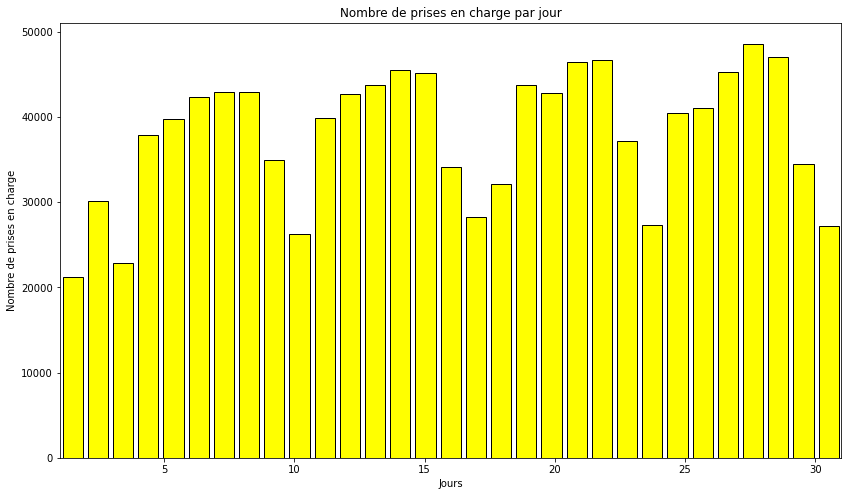

In [139]:
plt.hist(cab['Jours'], bins =31, color='yellow', edgecolor = 'black', rwidth=0.8, align='mid')
plt.xlim(1,31)
plt.xlabel('Jours')
plt.ylabel('Nombre de prises en charge')
plt.title('Nombre de prises en charge par jour');

In [140]:
cab['Hour']=cab.tpep_pickup_datetime.dt.time
cab['Hour']

<ipython-input-140-49b4ddc29a4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab['Hour']=cab.tpep_pickup_datetime.dt.time


0          00:30:10
2          00:43:30
3          00:15:48
4          00:31:49
5          00:16:29
             ...   
1271408    23:58:47
1271409    23:07:54
1271410    23:30:45
1271411    23:09:52
1271412    23:26:15
Name: Hour, Length: 1181487, dtype: object

In [141]:
distp= cab.iloc[:,[4,6]]
distp.max()

trip_distance    167.08
fare_amount      484.00
dtype: float64

In [142]:
distp.shape

(1181487, 2)

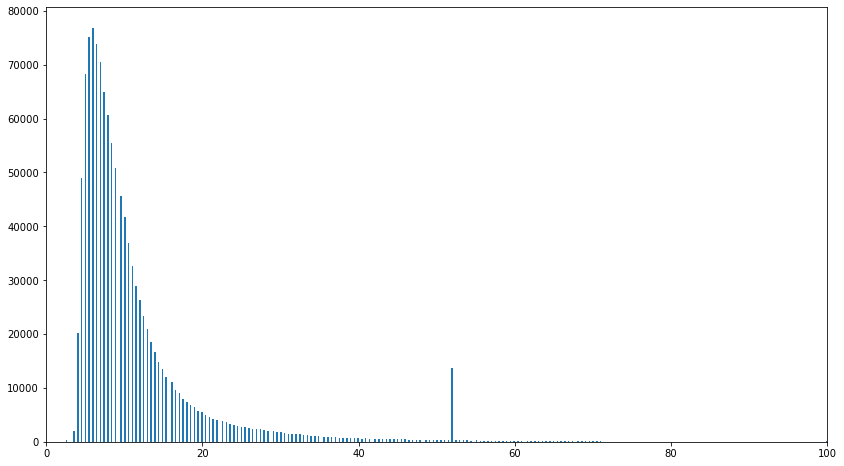

In [143]:
plt.hist(cab['fare_amount'], bins=2000, align='mid', rwidth= 0.8);
plt.xlim(0,100);


In [144]:
cab20 = cab.head(20)
cab20

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,Jours,Hour
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80,1,00:30:10
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95,1,00:43:30
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35,1,00:15:48
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36,1,00:31:49
5,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,8.0,3.0,2.35,0.00,14.15,1,00:16:29
6,1.0,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,2.0,16.0,0.5,0.00,0.00,17.30,1,00:00:28
7,1.0,2021-01-01 00:12:29,2021-01-01 00:30:34,1.0,5.70,2.0,18.0,3.0,0.00,0.00,21.80,1,00:12:29
8,1.0,2021-01-01 00:39:16,2021-01-01 01:00:13,1.0,9.10,4.0,27.5,0.5,0.00,0.00,28.80,1,00:39:16
9,1.0,2021-01-01 00:26:12,2021-01-01 00:39:46,2.0,2.70,1.0,12.0,3.0,3.15,0.00,18.95,1,00:26:12
10,2.0,2021-01-01 00:15:52,2021-01-01 00:38:07,3.0,6.11,1.0,20.5,0.5,0.00,0.00,24.30,1,00:15:52


In [145]:
conditionlist = [
    (cab20.values['trip_distance'] < 5.00) ,
    (cab20.values['trip_distance'] >= 5.00) & (cab20.values['trip_distance'] <20.00)]
choicelist = ['Tranche 0-5', 'Tranche 5-20', 'Tranche 20-40','Tranche 40-60','Tranche 60-100', 'Tranche 100-200']
cab20['Trip_Range'] = np.select(conditionlist, choicelist, default='Not Specified')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
conditionlist = [
    (cab20['trip_distance'] < 5.00) ,
    (cab20['trip_distance'] >= 5.00) & (cab20['trip_distance'] <20.00),
    (cab20['trip_distance'] >=20.00) & (cab20['trip_distance'] <40.00),
    (cab20['trip_distance'] >= 40.00) & (cab20['trip_distance'] <60.00),
    (cab20['trip_distance'] >= 60.00) & (cab20['trip_distance'] <100.00),
    (cab20['trip_distance'] >= 100.00) & (cab20['trip_distance'] <200.00)]
choicelist = ['Tranche 0-5', 'Tranche 5-20', 'Tranche 20-40','Tranche 40-60','Tranche 60-100', 'Tranche 100-200']
np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
plt.plot('fare_amount', 'trip_distance', data=cab20);

In [ ]:
cab['fare_amount'].max()

In [ ]:
plt.scatter('fare_amount', 'trip_distance', data=cab)
plt.xlim(0,486)
plt.ylim(0,100);

In [ ]:
cab.loc[cab['trip_distance'].between(0.5, 1.0),'trip_tr']='0 - 1 mile'
cab.loc[cab['trip_distance'].between(1.0, 5.0),'trip_tr']='1 - 5 miles'
cab.loc[cab['trip_distance'].between(5.0, 20.0),'trip_tr']='5 - 20 miles'
cab.loc[cab['trip_distance'].between(20.0, 50.0),'trip_tr']='20 - 50 miles'
cab.loc[cab['trip_distance'].between(50.0, 100.0),'trip_tr']='50 - 100 miles'
cab.loc[cab['trip_distance'].between(100.0, 200.0),'trip_tr']='100 - 200 miles'
cab

In [146]:
cab

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,Jours,Hour
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80,1,00:30:10
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95,1,00:43:30
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35,1,00:15:48
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36,1,00:31:49
5,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,8.0,3.0,2.35,0.00,14.15,1,00:16:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30,31,23:58:47
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30,31,23:07:54
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80,31,23:30:45
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92,31,23:09:52


In [ ]:
cab.pivot_table(index = "trip_tr", values = ["trip_distance","fare_amount"])

In [ ]:
pption = sns.distplot(cab['trip_distance'], bins=20)
pption.set(xlim=(0,200))

In [ ]:
filtretrip = (cab['trip_tr']=='0 - 1 mile')
cab.loc[filtretrip]


In [ ]:
cat = ['0 - 1 mile', '1 - 5 miles', '5 - 20 miles', '20 - 50 miles', '50 - 100 miles', '100 - 200 miles' ]
val = [235585,1048387, 126028, 6973, 90, 9]
df = pd.DataFrame(list(zip(cat,val)), columns = ['trip_tranche','distance'])
df


In [ ]:
plt.pie(labels=df.trip_tranche, x=df.distance)

In [ ]:
color=['yellow','black', 'grey', 'red', 'blue']
ax= sns.barplot(x=df.trip_tranche, y=df.distance)

ax.set_xlabel('Distance', fontsize=16)
ax.set_ylabel('Nombre de courses par tranche', fontsize=16)
ax.set_title('Quelle distance parcourent le plus les clients?', fontdict={'fontsize': 26})

In [ ]:
pption = sns.histplot(cab['trip_distance'], bins=80)


In [ ]:
distpp = sns.boxplot(data=cab, x='trip_tr', y='fare_amount')
distpp.set_ylim=(0,100)

In [ ]:
cab

In [148]:
cab['mode_paiement'] = cab['payment_type'].map({1.0: 1.0,
                                               2.0:2.0,
                                               3.0: 5.0,
                                                4.0: 5.0})
cab

<ipython-input-148-64c0fde05371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab['mode_paiement'] = cab['payment_type'].map({1.0: 1.0,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,Jours,Hour,mode_paiement
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2.0,8.0,3.0,0.00,0.00,11.80,1,00:30:10,2.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,42.0,0.5,8.65,0.00,51.95,1,00:43:30,1.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,29.0,0.5,6.05,0.00,36.35,1,00:15:48,1.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,16.5,0.5,4.06,0.00,24.36,1,00:31:49,1.0
5,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,8.0,3.0,2.35,0.00,14.15,1,00:16:29,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271408,2.0,2021-01-31 23:58:47,2021-02-01 00:04:40,3.0,0.81,2.0,5.0,0.5,0.00,0.00,6.30,31,23:58:47,2.0
1271409,2.0,2021-01-31 23:07:54,2021-01-31 23:19:42,1.0,3.81,2.0,12.5,0.5,0.00,0.00,16.30,31,23:07:54,2.0
1271410,2.0,2021-01-31 23:30:45,2021-01-31 23:35:13,1.0,1.32,2.0,6.0,0.5,0.00,0.00,9.80,31,23:30:45,2.0
1271411,2.0,2021-01-31 23:09:52,2021-01-31 23:51:56,2.0,10.56,1.0,37.5,0.5,0.00,6.12,44.92,31,23:09:52,1.0


In [150]:
cab.mode_paiement.unique()

array([2., 1., 5.])

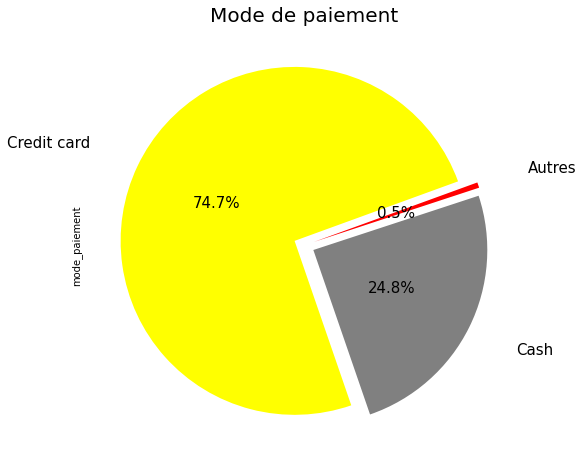

In [154]:
cab.mode = cab["mode_paiement"].value_counts()
explode = [0.06,0.06,0.06]
colors = ['yellow', 'grey', 'red']
labels = (['Credit card', 'Cash', 'Autres'])

don = cab.mode.plot.pie( autopct = "%.1f%%", pctdistance=0.5, colors = colors, labels = labels, 
                        labeldistance =1.3, rotatelabels=False, startangle = 20, explode = explode, textprops={'fontsize':'15'})

don.set_title("Mode de paiement", fontsize=20);

In [ ]:
cab["trip_distance"].value_counts().plot(kind='pie');

In [ ]:
filtredmp = cab7['payment_type']==3.0  and cab7['payment_type']==4.0
cab = cab7.loc[filtred0]
cab